In [20]:
import pandas as pd
df = pd.read_csv("AmesHousing.csv")
features_to_keep = ['Lot Area','Lot Shape','House Style','Neighborhood', 'Year Built','Bsmt Cond','Central Air','Overall Cond','Full Bath','TotRms AbvGrd','Fireplaces','Garage Area','Yr Sold','SalePrice']
df = df[features_to_keep]

# Fill Bsmt Cond (categorical feature) with 'None'
df["Bsmt Cond"] = df["Bsmt Cond"].fillna("None")

# Fill Garage Area with 0 (assumes missing = no garage)
df["Garage Area"] = df["Garage Area"].fillna(0)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# List of categorical and numeric columns
categorical_cols = ["Lot Shape", "House Style", "Neighborhood", "Bsmt Cond", "Central Air", "Overall Cond"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]



In [36]:
# Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ]
)

# Full pipeline: preprocessing + linear regression
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 41256.59756389454
R-squared: 0.7877023178137168


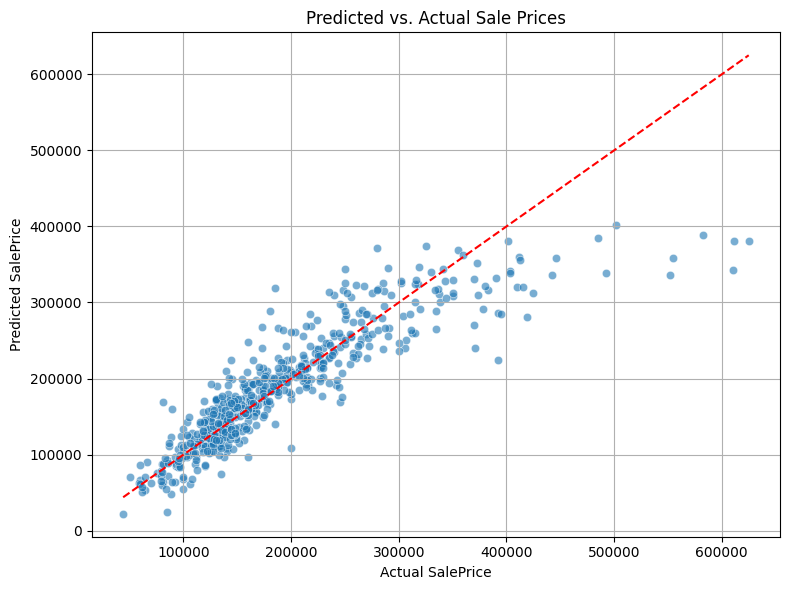

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs. Actual Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


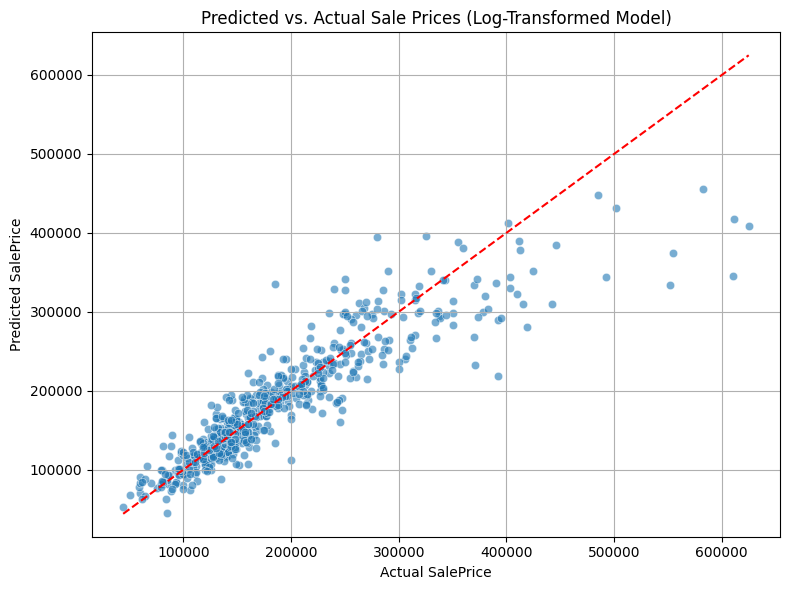

In [39]:
import numpy as np

# Log-transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Refit model on log-transformed target
model.fit(X_train, y_train_log)

# Predict and inverse-transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back to original scale
import numpy as np

# Convert log values back to actual prices
y_test_original = np.expm1(y_test_log)
y_pred_original = np.expm1(y_pred_log)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color="red", linestyle="--")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs. Actual Sale Prices (Log-Transformed Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test_original, y_pred_original)
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 38104.208159264934
R-squared: 0.8189058934281666
